In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
car=pd.read_csv('https://github.com/rajtilakls2510/car_price_predictor/raw/master/quikr_car.csv')

In [3]:
car.sample(15)

,name,company,year,Price,kms_driven,fuel_type
584,Maruti Suzuki Celerio VDi,Maruti,2018,"3,10,000","37,000 kms",Petrol
784,Maruti Suzuki Swift VDi,Maruti,2011,"2,50,000","58,000 kms",Diesel
255,Maruti Suzuki Wagon R 1.0,Maruti,2003,"90,000","45,000 kms",Petrol
376,Mahindra Jeep CL550 MDI,Mahindra,2019,"3,79,000","0,000 kms",Diesel
886,Toyota Corolla Altis,Toyota,2009,"3,00,000","1,32,000 kms",Petrol
406,Hyundai Elite i20 Sportz 1.2,Hyundai,2018,"6,00,000","7,800 kms",Petrol
833,Hyundai i20 Magna 1.2,Hyundai,2011,"2,30,000","47,000 kms",Petrol
568,Maruti Suzuki Alto,Maruti,2019,"2,65,000","9,800 kms",Petrol
730,Hyundai Santro,Hyundai,2003,"60,000","51,000 kms",Petrol
596,Renault Duster 85 PS RxL Diesel,Renault,2015,"3,85,000","51,000 kms",Diesel


In [4]:
car.shape

(892, 6)

In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [6]:
car['year'].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [7]:
# quality

# -Year has many none_year value
# -year object to int 
# -price has ask for price 
# -price has , 
# -kms_driven has kms with integers
# -kms_driven object to int 
# -kms_driven has nan value
# -fuel_type has nan value 
# -keep first 3 words of name 


# cleaning 

In [8]:
backup=car.copy()

In [9]:
#1
car = car[car['year'].str.isnumeric()]

In [10]:
#2
car['year']=car['year'].astype(int)

In [11]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 842 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        842 non-null    object
 1   company     842 non-null    object
 2   year        842 non-null    int32 
 3   Price       842 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: int32(1), object(5)
memory usage: 42.8+ KB


In [12]:
#3
car = car[car['Price']!='Ask For Price']

In [13]:
#4
car['Price']=car['Price'].str.replace(',','').astype(int)

In [14]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 819 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        819 non-null    object
 1   company     819 non-null    object
 2   year        819 non-null    int32 
 3   Price       819 non-null    int32 
 4   kms_driven  819 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int32(2), object(4)
memory usage: 38.4+ KB


In [15]:
#5
car['kms_driven']=car['kms_driven'].str.split(' ').str.get(0).str.replace(',','')

In [16]:
#6
car=car[car['kms_driven'].str.isnumeric()]

In [17]:
#7
car['kms_driven'] = car['kms_driven'].astype(int)

In [18]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int32 
 3   Price       817 non-null    int32 
 4   kms_driven  817 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.1+ KB


In [19]:
#8
car=car[~car['fuel_type'].isna()]

In [20]:
#9
car['name']=car['name'].str.split(' ').str.slice(0,3).str.join(' ')

In [21]:
car=car.reset_index(drop=True)

In [22]:
car.sample(10)

,name,company,year,Price,kms_driven,fuel_type
814,Tata Zest XM,Tata,2018,260000,27000,Diesel
542,Toyota Etios Liva,Toyota,2012,380000,20000,Diesel
7,Maruti Suzuki Alto,Maruti,2015,250000,60000,Petrol
473,Tata Indica,Tata,2005,80000,42000,Petrol
564,Hyundai Xcent SX,Hyundai,2015,400000,43000,Diesel
580,Tata Manza Aqua,Tata,2014,160000,200000,Diesel
320,Hyundai Elite i20,Hyundai,2016,549999,9000,Petrol
786,Maruti Suzuki Wagon,Maruti,2006,100000,7000,Petrol
214,Toyota Etios,Toyota,2011,275000,36000,Diesel
232,Honda Amaze,Honda,2013,284999,46000,Diesel


In [23]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 28.8+ KB


In [24]:
car.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


In [25]:
#outlier
car=car[car['Price']<6e6].reset_index(drop=True)

In [26]:
car.sample(5)

,name,company,year,Price,kms_driven,fuel_type
44,Honda City,Honda,2015,499999,55000,Petrol
364,Maruti Suzuki Swift,Maruti,2016,350000,166000,Diesel
30,Maruti Suzuki Swift,Maruti,2017,180000,15487,Petrol
479,Maruti Suzuki Zen,Maruti,2003,99999,53000,Petrol
529,Honda City 1.5,Honda,2009,269000,55000,Petrol


In [27]:
car.to_csv('cleaned_car.csv')

In [28]:
data=pd.read_csv('cleaned_car.csv')


In [29]:
data.sample(5)

,Unnamed: 0,name,company,year,Price,kms_driven,fuel_type
624,624,Tata Indica eV2,Tata,2015,140000,60105,Diesel
611,611,Hyundai Santro Xing,Hyundai,2014,179000,57000,Petrol
202,202,Mahindra Quanto C8,Mahindra,2013,375000,20000,Diesel
296,296,Maruti Suzuki Ertiga,Maruti,2015,524999,50000,Diesel
168,168,Mahindra Scorpio S10,Mahindra,2015,900000,97200,Diesel


In [30]:
data = data.iloc[:,1:]

In [50]:
data.sample(10)

,name,company,year,Price,kms_driven,fuel_type
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
785,Maruti Suzuki Wagon,Maruti,2006,100000,7000,Petrol
729,Hyundai Santro Xing,Hyundai,2007,55000,65000,Petrol
463,Maruti Suzuki Ertiga,Maruti,2015,550000,75000,Petrol
287,Tata Indica V2,Tata,2008,150000,11000,Petrol
501,Mitsubishi Lancer 1.8,Mitsubishi,2006,85000,50000,Petrol
208,Mahindra Bolero SLE,Mahindra,2013,330000,80200,Diesel
727,Tata Indica V2,Tata,2012,115000,64000,Diesel
142,Honda Amaze,Honda,2015,344999,22000,Petrol
419,Ford EcoSport Titanium,Ford,2014,500000,40000,Diesel


In [32]:

data['company'].value_counts()

Maruti        221
Hyundai       139
Mahindra       97
Tata           65
Honda          60
Toyota         36
Chevrolet      34
Renault        33
Ford           30
Volkswagen     19
Skoda          13
Audi           11
Mini            8
BMW             8
Datsun          7
Mitsubishi      6
Nissan          6
Mercedes        6
Fiat            4
Force           4
Hindustan       3
Jaguar          2
Land            1
Jeep            1
Volvo           1
Name: company, dtype: int64

<AxesSubplot: >

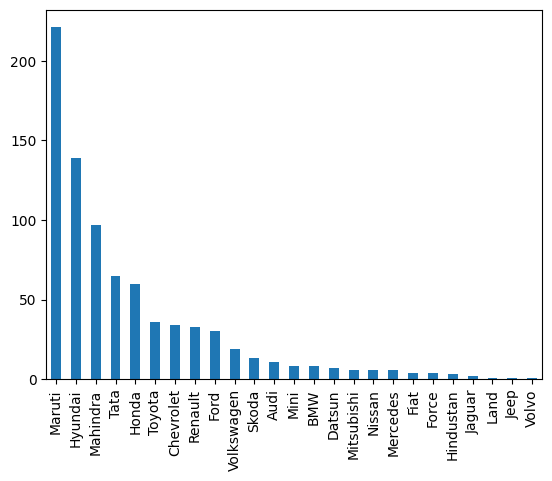

In [33]:
data['company'].value_counts().plot(kind='bar')

<AxesSubplot: xlabel='fuel_type', ylabel='count'>

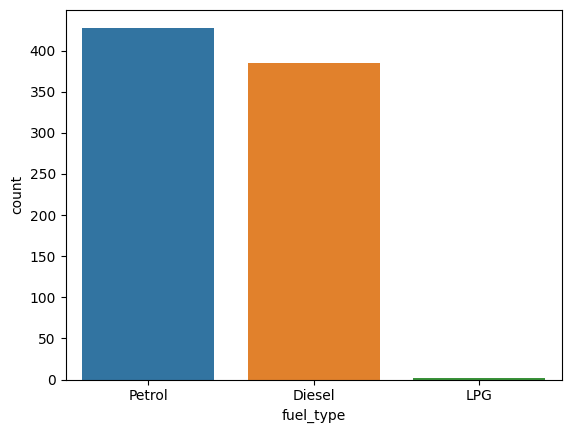

In [34]:
sns.countplot(data = data,x = 'fuel_type')

<AxesSubplot: xlabel='Price', ylabel='kms_driven'>

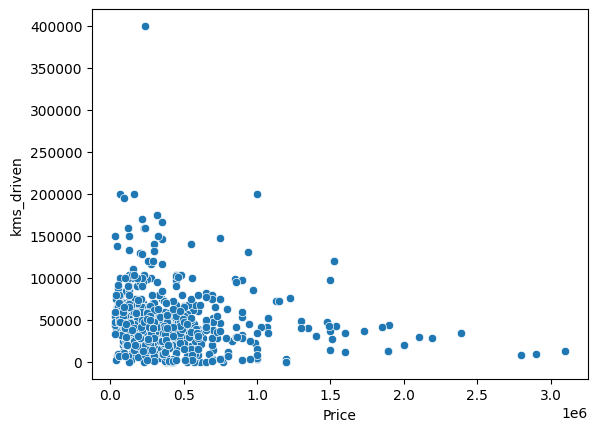

In [35]:
sns.scatterplot(data=data,x='Price',y='kms_driven')

<AxesSubplot: xlabel='Price', ylabel='fuel_type'>

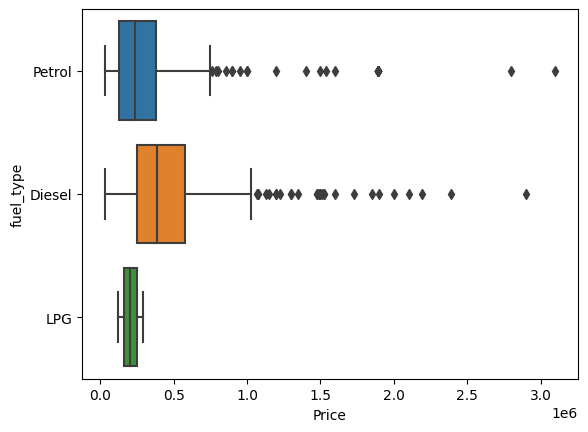

In [36]:
sns.boxplot(data=data,x='Price',y='fuel_type')

C:\Users\Hp\AppData\Local\Temp\ipykernel_2940\1794321463.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<AxesSubplot: >

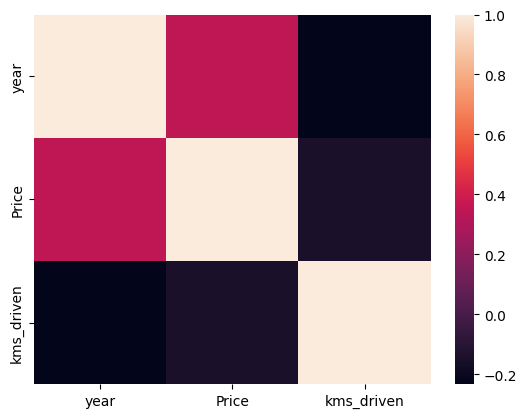

In [39]:
sns.heatmap(data.corr())

<AxesSubplot: xlabel='year', ylabel='Price'>

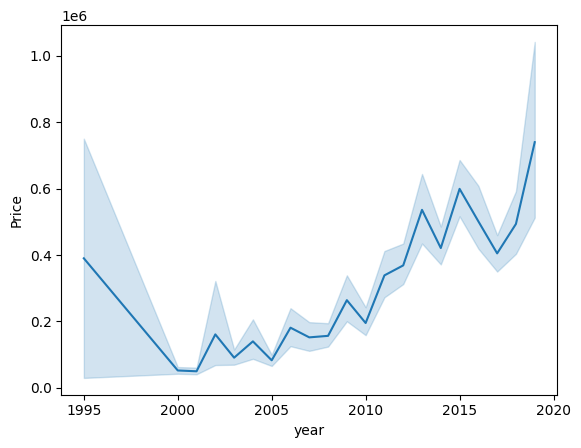

In [47]:
sns.lineplot(data=data,x='year',y='Price')

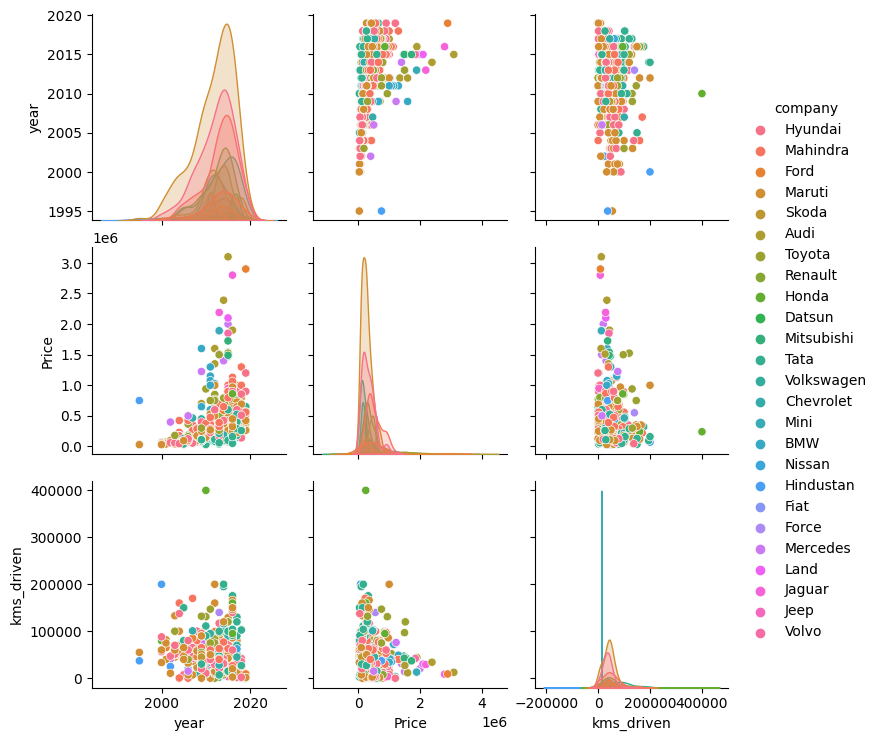

In [52]:
sns.pairplot(data,hue='company')